# Scraping From Tweeter
This uses scraper called snscrape that we are able to get older tweets from (Tweepy doesnt allow us to get tweets older than 7 days). You have to install git and then the repository from github: see here https://github.com/JustAnotherArchivist/snscrape/tree/master/snscrape/modules

# Putting Together the Data
After using the twitter scraper where we put in the various hashtags, we have a bunch of csv's of different antivax tweets sourced with different hashtags. The code before puts them together and cleans the dataset as well.

In [2]:
import os
os.getcwd()

'C:\\Users\\Steven\\TextAnalytics'

In [ ]:
import pandas as pd
import numpy as np
#note that unfortunately, we're not able to determine age and gender through the API

# df1=pd.read_csv("datatwitter.csv")
# df2=pd.read_csv("datatwitteraugust.csv")
# df3=pd.read_csv("datatwitterdec.csv")
# df4=pd.read_csv("datatwitterdectake.csv")
# df5=pd.read_csv("datatwitterfeb.csv")
# df6=pd.read_csv("datatwitterfebr.csv")
# df7=pd.read_csv("datatwitterjan.csv")
# df8=pd.read_csv("datatwitterjuly.csv")
# df9=pd.read_csv("datatwittermarch.csv")
# df10=pd.read_csv("datatwitteryear.csv")

df1=pd.read_csv("#vaccineskill1.csv")
df2=pd.read_csv("#vaccineskill2.csv")
df3=pd.read_csv("#vaccineskill3.csv")
df4=pd.read_csv("#vaccineskill4.csv")
df5=pd.read_csv("#vaccineskill5.csv")
df6=pd.read_csv("#vaccineskill6.csv")
df7=pd.read_csv("#vaccineskill7.csv")
df8=pd.read_csv("#vaccineskill8.csv")
df9=pd.read_csv("#vaccineskill9.csv")
df10=pd.read_csv("#vaccineskill10.csv")
df11=pd.read_csv("#vaccineskill11.csv")
df12=pd.read_csv("#vaccineskill12.csv")
df13=pd.read_csv("#vaccineskill13.csv")
df14=pd.read_csv("#vaccineskill14.csv")
df15=pd.read_csv("#vaccineskill15.csv")

df16=pd.read_csv("#IDoNotConsent1.csv")
df17=pd.read_csv("#IDoNotConsent2.csv")
df18=pd.read_csv("#IDoNotConsent3.csv")
df19=pd.read_csv("#IDoNotConsent4.csv")
df20=pd.read_csv("#IDoNotConsent5.csv")
df21=pd.read_csv("#IDoNotConsent6.csv")
df22=pd.read_csv("#IDoNotConsent7.csv")
df23=pd.read_csv("#IDoNotConsent8.csv")
df24=pd.read_csv("#IDoNotConsent9.csv")
df25=pd.read_csv("#IDoNotConsent10.csv")
df26=pd.read_csv("#IDoNotConsent11.csv")
df27=pd.read_csv("#IDoNotConsent12.csv")
df28=pd.read_csv("#IDoNotConsent13.csv")
df29=pd.read_csv("#IDoNotConsent14.csv")
df30=pd.read_csv("#IDoNotConsent15.csv")


list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30]
df = pd.concat(list, ignore_index=True, sort=False)
for i in list:
    print(i.shape) 
df.shape

* Note that unfortunately, we're not able to determine age and gender through the API
* It seems like Twitter has blocked/wiped certain major anti-vax hashtags, when you try to scrape these, it doesnt work
    * #vaccinescauseautism 
    * #vaccinesarepoison
    * #vaccinescauseaids
    * #donttakethevacine

In [2]:
print("Total Combined Data Row Count")
print(df.shape)

Total Combined Data Row Count
(10881, 10)


In [3]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
print(df.shape)
df.head()

(10870, 9)


,Datetime,Tweet Id,Text,Username,followersCount,listedCount,Location,mentioned_users,retweet
0,2020-01-30 21:43:22+00:00,1222998766199984130,#vaccines #vexit #vaccineinjury #vaccineskill ...,mass4mf,968,6,"Boston, MA",NaN,NaN
1,2020-01-30 11:26:36+00:00,1222843552666980352,#vaccinateyourdamnkids 🤑🙄\nSo the CEO of Merck...,Dontmesswmama2,13,0,NaN,NaN,NaN
2,2020-01-29 18:45:24+00:00,1222591590528638976,@av_chance @BetterWellness3 @AMCarrieWoerner A...,UnwaveringN,66,0,"New York, USA","[User(username='AMCarrieWoerner', displayname=...",NaN
3,2020-01-29 18:44:14+00:00,1222591296021450754,@av_chance @BetterWellness3 @AMCarrieWoerner A...,UnwaveringN,66,0,"New York, USA","[User(username='AMCarrieWoerner', displayname=...",NaN
4,2020-01-29 15:51:04+00:00,1222547719098519552,@ceestave @PatriotsDontSlp @elenochle @IPOT177...,zenmonster1,352,1,NaN,"[User(username='ceestave', displayname='🇺🇸❌Can...",NaN


# Start Here

In [4]:
#quicksave
df.to_csv("full_df.csv",index=False)

# Processing

In [5]:
df=pd.read_csv("full_df.csv")
df['mentioned_users'] = df['mentioned_users'].str.replace('User','')
df['mentioned_users'] = df['mentioned_users'].str.replace('(', ' ')
df['mentioned_users'] = df['mentioned_users'].str.replace(')', ' ')
df['mentioned_users'] = df['mentioned_users'].str.replace('[', ' ')
df['mentioned_users'] = df['mentioned_users'].str.replace(']', ' ')
df['mentioned_users'] = df['mentioned_users'].str.replace(','," ")
df['Datetime'] = df['Datetime'].str[:10]
df['mentioned_users'][1]

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """
C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher

nan

In [6]:
#looking at the data above, I'll brute force process out the usernames
import pandas as pd
import nltk
import fnmatch
df["mentioned_users"] = df["mentioned_users"].fillna("").map(nltk.word_tokenize)
df['mentioned_users'] = df.apply(lambda row: fnmatch.filter(row["mentioned_users"], "username='*"), axis=1)
df['mentioned_users'] = df['mentioned_users'].astype(str).str.replace("username=",'')
df['mentioned_users'] = df['mentioned_users'].astype(str).str.replace('"','')
df['mentioned_users'] = df['mentioned_users'].astype(str).str.replace("'","")

In [7]:
df.head()

,Datetime,Tweet Id,Text,Username,followersCount,listedCount,Location,mentioned_users,retweet
0,2020-01-30,1222998766199984130,#vaccines #vexit #vaccineinjury #vaccineskill ...,mass4mf,968,6,"Boston, MA",[],NaN
1,2020-01-30,1222843552666980352,#vaccinateyourdamnkids 🤑🙄\nSo the CEO of Merck...,Dontmesswmama2,13,0,NaN,[],NaN
2,2020-01-29,1222591590528638976,@av_chance @BetterWellness3 @AMCarrieWoerner A...,UnwaveringN,66,0,"New York, USA",[AMCarrieWoerner],NaN
3,2020-01-29,1222591296021450754,@av_chance @BetterWellness3 @AMCarrieWoerner A...,UnwaveringN,66,0,"New York, USA",[AMCarrieWoerner],NaN
4,2020-01-29,1222547719098519552,@ceestave @PatriotsDontSlp @elenochle @IPOT177...,zenmonster1,352,1,NaN,"[ceestave, PatriotsDontSlp, elenochle, IPOT177...",NaN


# Process Location Data

In [8]:
df['Location'] = df['Location'].fillna(0)
df_u = pd.DataFrame(df['Location'].unique(), columns=['Location'])

In [9]:
#pip install geopy
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_application")

location = df['Location'].unique()
longitude_whole = []
latitude_whole = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for place in tqdm(location):
    try:
        lo = float(geolocator.geocode(place).longitude)
        longitude_whole.append(lo)
        la = float(geolocator.geocode(place).latitude)
        latitude_whole.append(la)
    except:
        #pass
        longitude_whole.append("Not Found")
        latitude_whole.append("Not Found")

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


|          | 0/? [00:00<?, ?it/s]

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/1244 [00:00<?, ?it/s]

In [10]:
df_u = pd.DataFrame(location, columns=['Location'])
df_u['longitude'] = longitude_whole
df_u['latitude']  = latitude_whole
df_u

,Location,longitude,latitude
0,"Boston, MA",-71.058291,42.360253
1,0,Not Found,Not Found
2,"New York, USA",-74.006015,40.712728
3,Divine Spirit,120.965867,14.127375
4,"Caroga Lake, NY",-74.481030,43.137837
...,...,...,...
1239,"Lage, lage landen",6.017249,52.216960
1240,Corbyn Country,Not Found,Not Found
1241,Swinford. Ireland,-8.949812,53.943516
1242,Berlin,13.388860,52.517037


In [11]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   1244 non-null   object
 1   longitude  1244 non-null   object
 2   latitude   1244 non-null   object
dtypes: object(3)
memory usage: 29.3+ KB


In [12]:
df_new = df.merge(df_u, left_on='Location', right_on='Location')


In [13]:
df_new.to_csv("full_df.csv",index=False)

In [14]:
df_new.head()

,Datetime,Tweet Id,Text,Username,followersCount,listedCount,Location,mentioned_users,retweet,longitude,latitude
0,2020-01-30,1222998766199984130,#vaccines #vexit #vaccineinjury #vaccineskill ...,mass4mf,968,6,"Boston, MA",[],NaN,-71.058291,42.360253
1,2020-01-30,1222843552666980352,#vaccinateyourdamnkids 🤑🙄\nSo the CEO of Merck...,Dontmesswmama2,13,0,0,[],NaN,Not Found,Not Found
2,2020-01-29,1222547719098519552,@ceestave @PatriotsDontSlp @elenochle @IPOT177...,zenmonster1,352,1,0,"[ceestave, PatriotsDontSlp, elenochle, IPOT177...",NaN,Not Found,Not Found
3,2020-01-29,1222547380190371840,@ceestave @PatriotsDontSlp @elenochle @IPOT177...,zenmonster1,352,1,0,"[ceestave, PatriotsDontSlp, elenochle, IPOT177...",NaN,Not Found,Not Found
4,2020-01-28,1222271699829194752,@OANN @realDonaldTrump Haaaaa #WhatCouldGoWron...,zenmonster1,352,1,0,"[OANN, realDonaldTrump]",NaN,Not Found,Not Found


# Experimental Section (Ignore - Rough Work)

In [3]:
#there seems to be some empty rows, this removes them by targeting a row that shouldnt be empty
df.dropna(subset=['tweet_id'], inplace=True)
#there also seems to be some duplicate data, this cleans out the duplicates 
df.drop_duplicates(subset=None, keep="first", inplace=True)

df = df.reset_index()
df = df.drop(["index"],axis=1)
df.shape

(7497, 13)

In [5]:
#some data cleaning
df['target'] = df['target'].str.replace('[', '')
df['target'] = df['target'].str.replace(']', '')
df['target'] = df['target'].str.replace("'", '')
df['tweet'] = df['tweet'].str.replace("b'", '')
df['tweet'] = df['tweet'].str.replace('b"', '')
df.head()

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,user,target,location,tweet,date,retweet,reply@,retweet_count,follower_count,listed_count,hashtags,url_exmaples
0,1.376726e+18,EandPCartoons,BennettCartoons,NaN,RT @BennettCartoons: 3/30/2021- The Remedy #an...,2013-05-31 22:53:04,False,NaN,18.0,862.0,20.0,"[{'text': 'antivax', 'indices': [43, 51]}, {'t...","[{'url': 'https://t.co/bgvxygo6X1', 'expanded_..."
1,1.376723e+18,andersonc72,BennettCartoons,"Bogotá, D.C.",RT @BennettCartoons: 3/30/2021- The Remedy #an...,2011-02-04 00:17:33,False,NaN,18.0,403.0,4.0,"[{'text': 'antivax', 'indices': [43, 51]}, {'t...","[{'url': 'https://t.co/bgvxygo6X1', 'expanded_..."
2,1.376716e+18,bones_neon,,NaN,Witnessed an anti masker mouth off at a servo ...,2019-05-17 01:59:06,False,NaN,0.0,62.0,0.0,[],"[{'url': 'https://t.co/rq7tg6OMOh', 'expanded_..."
3,1.376711e+18,newyarkmedic,,"New York, USA",#Vaccinated\xc2\xa0100+ ppl in Jersey City tod...,2021-03-10 12:22:45,False,NaN,0.0,17.0,0.0,"[{'text': 'Vaccinated', 'indices': [0, 11]}, {...","[{'url': 'https://t.co/NqtDgCTKJk', 'expanded_..."
4,1.376700e+18,BrettParnell463,fordnation,"Ottawa, Canada",We can't wait till 2022 to get #antivax premie...,2011-08-29 15:58:22,False,NaN,0.0,944.0,26.0,"[{'text': 'antivax', 'indices': [31, 39]}]","[{'url': 'https://t.co/vjZ7UTzp95', 'expanded_..."


# Hashtag Analysis
This loops basically parses our the individual hashtags from the hashtag column. We used this to see what other hashtag that are mentioned together in order to source additional data.

In [6]:
import numpy as np
df['filt_hashtags']= np.nan

for i in range(len(df)):  
    empty = []
    if df['hashtags'][i]!='[]':
        #print(i)
        try:
            for ht in eval(df['hashtags'][i][1:-1]):
                empty.append(ht['text'])
        except TypeError:
            empty.append(eval(df['hashtags'][i][1:-1])['text'])
        
        df['filt_hashtags'][i] = empty

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Steven\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
#some data cleaning
df = df.drop(["hashtags"],axis=1)
df['filt_hashtags'] = df['filt_hashtags'].astype(str).str.replace('[', '')
df['filt_hashtags'] = df['filt_hashtags'].astype(str).str.replace(']', '')
df['filt_hashtags'] = df['filt_hashtags'].astype(str).str.replace("'", '')
df['filt_hashtags'] = df["filt_hashtags"].astype(str).str.lower()

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [8]:
#after investigating the data, we found some tweets that contain hashtags that actually isnt anti-vax. This cleans out those rows.
df = df[~df.filt_hashtags.str.contains('fightforfreedom')]
df = df[~df.filt_hashtags.str.contains('hcldr')]
df = df[~df.filt_hashtags.str.contains('abortion')]
df.to_csv("full_df.csv",index=False)

In [9]:
df.to_csv("full_df.csv",index=False)

# Location Data

In [10]:
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_application")

In [11]:
longitude_whole = []
latitude_whole = []
magnitude_whole = []
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for place in tqdm(df.location):
    try:
        lo = float(geolocator.geocode(place).longitude)
        longitude_whole.append(lo)
        la = float(geolocator.geocode(place).latitude)
        latitude_whole.append(la)
    except:
        pass

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


|          | 0/? [00:00<?, ?it/s]

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/7324 [00:00<?, ?it/s]

In [12]:
locations_whole = pd.DataFrame({"latitude": latitude_whole, "longitude": longitude_whole})
locations_whole

ValueError: arrays must all be same length

In [16]:
len(longitude_whole)

6693

In [18]:
latitude_whole.append("test")
len(latitude_whole)

6693

In [19]:
locations_whole = pd.DataFrame({"latitude": latitude_whole, "longitude": longitude_whole})
locations_whole

,latitude,longitude
0,46.314475,11.048029
1,4.672662,-74.058174
2,46.314475,11.048029
3,40.712728,-74.006015
4,45.421106,-75.690308
...,...,...
6688,51.000000,-86.000977
6689,46.314475,-109.000000
6690,46.314475,11.048029
6691,46.314475,11.048029


In [20]:
df['latitude'] = locations_whole['latitude']
df['longitude'] = locations_whole['longitude']
df

,tweet_id,user,target,location,tweet,date,retweet,reply@,retweet_count,follower_count,listed_count,url_exmaples,filt_hashtags,latitude,longitude
0,1.376726e+18,EandPCartoons,BennettCartoons,NaN,RT @BennettCartoons: 3/30/2021- The Remedy #an...,2013-05-31 22:53:04,False,NaN,18.0,862.0,20.0,"[{'url': 'https://t.co/bgvxygo6X1', 'expanded_...","antivax, antivaxxers, vaccines, herdimmunity, ...",46.314475,11.048029
1,1.376723e+18,andersonc72,BennettCartoons,"Bogotá, D.C.",RT @BennettCartoons: 3/30/2021- The Remedy #an...,2011-02-04 00:17:33,False,NaN,18.0,403.0,4.0,"[{'url': 'https://t.co/bgvxygo6X1', 'expanded_...","antivax, antivaxxers, vaccines, herdimmunity, ...",4.672662,-74.058174
2,1.376716e+18,bones_neon,,NaN,Witnessed an anti masker mouth off at a servo ...,2019-05-17 01:59:06,False,NaN,0.0,62.0,0.0,"[{'url': 'https://t.co/rq7tg6OMOh', 'expanded_...",nan,46.314475,11.048029
3,1.376711e+18,newyarkmedic,,"New York, USA",#Vaccinated\xc2\xa0100+ ppl in Jersey City tod...,2021-03-10 12:22:45,False,NaN,0.0,17.0,0.0,"[{'url': 'https://t.co/NqtDgCTKJk', 'expanded_...","vaccinated, antivax, covid",40.712728,-74.006015
4,1.376700e+18,BrettParnell463,fordnation,"Ottawa, Canada",We can't wait till 2022 to get #antivax premie...,2011-08-29 15:58:22,False,NaN,0.0,944.0,26.0,"[{'url': 'https://t.co/vjZ7UTzp95', 'expanded_...",antivax,45.421106,-75.690308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,1.374485e+18,DefenderValues,,North America,"Hence he gets to further the ""get the ja narra...",2020-10-31 03:04:22,False,NaN,0.0,361.0,3.0,"[{'url': 'https://t.co/lrHl7c0oNz', 'expanded_...",nan,NaN,NaN
7493,1.374484e+18,bcgift,KyleDelecto,NaN,RT @KyleDelecto: #JUSTSAYNO Nothing but N95 ma...,2015-08-25 05:03:27,False,NaN,1.0,660.0,10.0,[],justsayno,NaN,NaN
7494,1.374483e+18,sanjaleksic,"monsanto2000, chrissaccoccia1",NaN,RT @monsanto2000: Toronto's Lockdown protester...,2009-06-19 16:35:40,False,NaN,270.0,248.0,1.0,[],justsayno,NaN,NaN
7495,1.374483e+18,CaptCanuck6,,George Soros Floating Tower,#JUSTSAYNO to bigots like Donald Smith https:/...,2020-06-07 18:08:08,False,NaN,0.0,1358.0,2.0,"[{'url': 'https://t.co/znbNnvlY99', 'expanded_...",justsayno,NaN,NaN


In [21]:
df.to_csv("full_df.csv",index=False)

In [30]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

OSError: [WinError 126] The specified module could not be found

In [31]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

OSError: [WinError 126] The specified module could not be found

After we have a good dataset, we go into excel for some preprocessing to make it ready for network building and analysis. Part of this includes creating new records from multi-value columns using Excel Power Query. More info can be found by just googling how to do this like here:
https://www.techrepublic.com/article/a-super-easy-way-to-generate-new-records-from-multi-value-columns-using-excels-power-query/

# Visualize Location Data
The location column is pretty messy in terms of data as users can put anything they want into their location field. A word cloud is a an okay initial method to visualize this column.

In [131]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [150]:
#some data cleaning
df['location'] = df['location'].astype(str).str.replace('.', '')
df['location'] = df['location'].astype(str).str.replace(',', '')
df['location'] = df['location'].astype(str).str.replace("'", '')
df['location'] = df["location"].astype(str).str.lower()
df['location'] = df['location'].astype(str).str.replace("united states",'USA')
df['location'] = df['location'].astype(str).str.replace("united kingdom",'UK')
df['location'] = df['location'].astype(str).str.replace("toronto ontario",'toronto')
df['location'] = df['location'].astype(str).str.replace("toronto",'toronto ontario')

C:\Users\Steven\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [151]:
value_counts = df['location'].value_counts().rename_axis('unique_values').reset_index(name='counts')
value_counts.head(20)

,unique_values,counts
0,nan,2752
1,canada,153
2,ontario canada,126
3,usa,125
4,toronto ontario,99
5,uk,93
6,nolita manhattan,64
7,england uk,57
8,london england,53
9,london ontario,47


In [154]:
text = " ".join(review for review in df.location.astype(str))

stopwords = set(STOPWORDS)
stopwords.update(["nan"])
wordcloud = WordCloud(stopwords=stopwords,background_color="white",width=3000, height=1500).generate(text)

#seeing Canada, USA and UK probably isnt that useful, here's those included in the stopwords
stopwords2 = set(STOPWORDS)
stopwords2.update(["nan","canada","usa","uk"])
wordcloud2 = WordCloud(stopwords=stopwords2,background_color="white",width=3000, height=1500).generate(text)

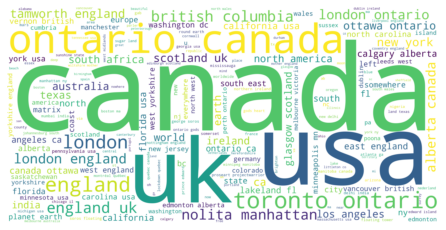

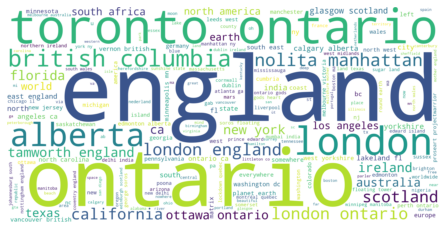

In [155]:
plt.axis("off")
#plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

plt.axis("off")
#plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

We are able to observe that a lot of the tweets are coming from Canada, namely:
* Ontario, Alberta and BC 
* for people that specified just England, we are not sure which England they are referring to, could be a mix of UK or Canada